In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re


In [55]:
df = pd.read_csv("../Datos/Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20240605.csv")

C:\Users\joanm\AppData\Local\Temp\ipykernel_24080\3248383544.py:1: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../Datos/Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20240605.csv")


In [56]:
df.head()

,CodigoEstacion,CodigoSensor,FechaObservacion,ValorObservado,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud,DescripcionSensor,UnidadMedida
0,26195501,68,01/21/2020 03:35:00 AM,15.85716,ANDES - AUT,ANTIOQUIA,ANDES,CAUCA,5.660108,-75.914139,Temp Aire 2 m,°C
1,54025010,68,01/21/2020 01:00:00 AM,19.30000,PR CHOCO: SAN JOSE PALMAR,CHOCÓ,SAN JOSÉ DEL PALMAR,SAN JUÁN,4.898000,-76.232000,Temp Aire 2 m,°C
2,2120000104,68,07/01/2019 05:48:00 AM,10.03000,COLEGIO MIGUEL ANTONIO CARO - AUT,BOGOTA D.C.,"BOGOTA, D.C",ALTO MAGDALENA,4.813000,-74.031000,Temp Aire 2 m,°C
3,31095030,68,07/01/2019 12:00:00 PM,28.50000,PTO INIRIDA,GUAINÍA,INÍRIDA,INÍRIDA,3.868000,-67.932000,Temp Aire 2 m,°C
4,2201500047,68,01/21/2020 01:00:00 PM,21.70000,HERRERA - AUT,TOLIMA,PLANADAS,SALDAÑA,3.284139,-75.802450,Temp Aire 2 m,°C


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1575124 entries, 0 to 1575123
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   CodigoEstacion     1575124 non-null  object 
 1   CodigoSensor       1575120 non-null  object 
 2   FechaObservacion   1575119 non-null  object 
 3   ValorObservado     1575119 non-null  float64
 4   NombreEstacion     1575119 non-null  object 
 5   Departamento       1575119 non-null  object 
 6   Municipio          1575119 non-null  object 
 7   ZonaHidrografica   1575119 non-null  object 
 8   Latitud            1575119 non-null  float64
 9   Longitud           1575119 non-null  float64
 10  DescripcionSensor  1575119 non-null  object 
 11  UnidadMedida       1575119 non-null  object 
dtypes: float64(3), object(9)
memory usage: 144.2+ MB


In [58]:
df.describe()

,ValorObservado,Latitud,Longitud
count,1.575119e+06,1.575119e+06,1.575119e+06
mean,1.857541e+01,5.002159e+00,-7.488058e+01
std,6.365663e+00,2.037825e+00,1.735062e+00
min,0.000000e+00,-4.194000e+00,-8.173100e+01
25%,1.500000e+01,4.343000e+00,-7.579333e+01
50%,1.840000e+01,4.726389e+00,-7.499611e+01
75%,2.277676e+01,5.625831e+00,-7.406667e+01
max,5.000000e+01,1.579700e+01,0.000000e+00


In [59]:
df.describe(include="object")

,CodigoEstacion,CodigoSensor,FechaObservacion,NombreEstacion,Departamento,Municipio,ZonaHidrografica,DescripcionSensor,UnidadMedida
count,1575124,1575120,1575119,1575119,1575119,1575119,1575119,1575119,1575119
unique,906,3,584177,534,39,367,32,1,1
top,21201980,68,01/21/2020 04:00:00 PM,CERRO GUADALUPE - FOPAE,BOGOTA D.C.,"BOGOTA, D.C",ALTO MAGDALENA,Temp Aire 2 m,°C
freq,17152,1572864,329,17168,300760,318260,525642,1575119,1575119


In [60]:
df.keys()

Index(['CodigoEstacion', 'CodigoSensor', 'FechaObservacion', 'ValorObservado',
       'NombreEstacion', 'Departamento', 'Municipio', 'ZonaHidrografica',
       'Latitud', 'Longitud', 'DescripcionSensor', 'UnidadMedida'],
      dtype='object')

In [61]:
df.dropna(inplace=True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1575119 entries, 0 to 1575118
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   CodigoEstacion     1575119 non-null  object 
 1   CodigoSensor       1575119 non-null  object 
 2   FechaObservacion   1575119 non-null  object 
 3   ValorObservado     1575119 non-null  float64
 4   NombreEstacion     1575119 non-null  object 
 5   Departamento       1575119 non-null  object 
 6   Municipio          1575119 non-null  object 
 7   ZonaHidrografica   1575119 non-null  object 
 8   Latitud            1575119 non-null  float64
 9   Longitud           1575119 non-null  float64
 10  DescripcionSensor  1575119 non-null  object 
 11  UnidadMedida       1575119 non-null  object 
dtypes: float64(3), object(9)
memory usage: 156.2+ MB


In [63]:
pacifico_colombiano = {
    "Chocó": [
        "Quibdó",
        "Nuquí",
        "Bahía Solano",
        "Acandí",
        "Jurado",
        "Lloró",
        "El Carmen de Atrato",
        "Istmina",
        "Riosucio",
        "Unguía",
        "Bojayá",
        "El Cantón de San Pablo",
        "Medio Atrato",
        "Medio Baudó",
        "Bajo Baudó"
    ],
    "Valle del Cauca": [
        "Buenaventura",
        "Cali",
        "Dagua",
        "La Cumbre"
    ],
    "Cauca": [
        "Guapi",
        "López de Micay",
        "Timbiquí"
    ],
    "Nariño": [
        "Tumaco",
        "Francisco Pizarro",
        "El Charco",
        "La Tola",
        "Mosquera",
        "Olaya Herrera",
        "Santa Bárbara (Iscuandé)",
        "Roberto Payán"
    ]
}

print(pacifico_colombiano)


{'Chocó': ['Quibdó', 'Nuquí', 'Bahía Solano', 'Acandí', 'Jurado', 'Lloró', 'El Carmen de Atrato', 'Istmina', 'Riosucio', 'Unguía', 'Bojayá', 'El Cantón de San Pablo', 'Medio Atrato', 'Medio Baudó', 'Bajo Baudó'], 'Valle del Cauca': ['Buenaventura', 'Cali', 'Dagua', 'La Cumbre'], 'Cauca': ['Guapi', 'López de Micay', 'Timbiquí'], 'Nariño': ['Tumaco', 'Francisco Pizarro', 'El Charco', 'La Tola', 'Mosquera', 'Olaya Herrera', 'Santa Bárbara (Iscuandé)', 'Roberto Payán']}


In [64]:
pacifico_colombiano.keys()

dict_keys(['Chocó', 'Valle del Cauca', 'Cauca', 'Nariño'])

In [65]:
pkeys = [i.upper() for i in pacifico_colombiano.keys()] #creamos una lista con los departamentos que pertenecen al pacifico que son las llaves de la lista pacifico_colombiano y las guardamos en mayusculas

In [66]:
pkeys

['CHOCÓ', 'VALLE DEL CAUCA', 'CAUCA', 'NARIÑO']

In [67]:
pkeys[3] = 'NARINO' #cambiamos a nariño por un formato sin la letra n

In [68]:
pkeys

['CHOCÓ', 'VALLE DEL CAUCA', 'CAUCA', 'NARINO']

In [69]:
df.keys()

Index(['CodigoEstacion', 'CodigoSensor', 'FechaObservacion', 'ValorObservado',
       'NombreEstacion', 'Departamento', 'Municipio', 'ZonaHidrografica',
       'Latitud', 'Longitud', 'DescripcionSensor', 'UnidadMedida'],
      dtype='object')

In [70]:
df.Departamento.value_counts()

Departamento
BOGOTA D.C.               300760
CUNDINAMARCA              153224
CALDAS                    137961
ANTIOQUIA                 119804
VALLE DEL CAUCA           105068
TOLIMA                     86519
HUILA                      83015
RISARALDA                  63808
BOYACÁ                     63544
NORTE DE SANTANDER         59746
CAUCA                      52626
SANTANDER                  50635
NARIÑO                     49787
QUINDÍO                    46520
MAGDALENA                  24157
CESAR                      22431
BOGOTA                     17500
META                       15278
CASANARE                   14706
CHOCO                      12286
LA GUAJIRA                 11863
CAQUETA                    11531
SUCRE                      11442
CHOCÓ                      10592
CÓRDOBA                     7249
BOLIVAR                     6905
PUTUMAYO                    5906
CORDOBA                     5483
ATLANTICO                   4671
AMAZONAS                    39

In [71]:
df.keys()

Index(['CodigoEstacion', 'CodigoSensor', 'FechaObservacion', 'ValorObservado',
       'NombreEstacion', 'Departamento', 'Municipio', 'ZonaHidrografica',
       'Latitud', 'Longitud', 'DescripcionSensor', 'UnidadMedida'],
      dtype='object')

In [72]:
df = df[df["Departamento"].isin(pkeys)] #Hacemos el dataset solo con los registros del departamento del pacifico

In [73]:
df.shape #vemos cuantos datos nos quedaron

(168972, 12)

In [74]:
df.Departamento.value_counts() #vemos cuantos registros tenemos de cada departamento del pacifico

Departamento
VALLE DEL CAUCA    105068
CAUCA               52626
CHOCÓ               10592
NARINO                686
Name: count, dtype: int64

In [75]:
df.ZonaHidrografica.value_counts() #vemos la diferentes zonas hidrograficas que estan en el dataset y sus cantidades

ZonaHidrografica
CAUCA                        88833
PATÍA                        23375
TAPAJE - DAGUA - DIRECTOS    22861
SAN JUÁN                     15316
ATRATO - DARIÉN               6833
ALTO MAGDALENA                4012
GUAVIARE                      2815
BAUDÓ - DIRECTOS PACIFICO     2593
PACÍFICO - DIRECTOS           1029
MIRA                           686
<nil>                          619
Name: count, dtype: int64

In [76]:
len(list(df.FechaObservacion.unique()))

131108

In [77]:
df.head()

,CodigoEstacion,CodigoSensor,FechaObservacion,ValorObservado,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud,DescripcionSensor,UnidadMedida
1,54025010,68,01/21/2020 01:00:00 AM,19.30000,PR CHOCO: SAN JOSE PALMAR,CHOCÓ,SAN JOSÉ DEL PALMAR,SAN JUÁN,4.898000,-76.232000,Temp Aire 2 m,°C
19,26125503,68,01/21/2020 01:20:00 PM,24.59092,LA SIRENA - AUT,VALLE DEL CAUCA,SEVILLA,CAUCA,4.285000,-75.902500,Temp Aire 2 m,°C
29,54015020,68,07/01/2019 04:00:00 AM,23.50000,PR CHOCO: TADO,CHOCÓ,TADÓ,SAN JUÁN,5.270000,-76.552000,Temp Aire 2 m,°C
30,26125503,68,01/21/2020 09:05:00 PM,18.04923,LA SIRENA - AUT,VALLE DEL CAUCA,SEVILLA,CAUCA,4.285000,-75.902500,Temp Aire 2 m,°C
33,26065502,68,01/21/2020 06:15:00 PM,17.16564,TRINIDAD LA - AUT,CAUCA,PIENDAMÓ,CAUCA,2.750556,-76.579167,Temp Aire 2 m,°C


In [78]:
exclude_zones = ["CAUCA", "SAN JUÁN", "PATÍA", "TAPAJE - DAGUA - DIRECTOS", "ATRATO - DARIÉN", "ALTO MAGDALENA", "GUAVIARE", "BAUDÓ - DIRECTOS PACIFICO", "PACÍFICO - DIRECTOS", "MIRA"]

# Filter the dataframe
df_inf = df[~df["ZonaHidrografica"].isin(exclude_zones)] #Buscamos los valores donde el registro no tenga ninguna de las zonas hidrograficas de exclude_zones

In [79]:
df_inf

,CodigoEstacion,CodigoSensor,FechaObservacion,ValorObservado,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud,DescripcionSensor,UnidadMedida
38464,56015040,68,03/04/2019 11:00:00 PM,26.1,PR CHOCO: JURADO,CHOCÓ,JURADO,<nil>,7.104,-77.764,Temp Aire 2 m,°C
39818,56015040,68,07/30/2018 07:00:00 PM,24.4,PR CHOCO: JURADO,CHOCÓ,JURADO,<nil>,7.104,-77.764,Temp Aire 2 m,°C
40313,56015040,68,01/04/2019 10:00:00 PM,25.6,PR CHOCO: JURADO,CHOCÓ,JURADO,<nil>,7.104,-77.764,Temp Aire 2 m,°C
40928,56015040,68,11/27/2018 06:00:00 AM,24.1,PR CHOCO: JURADO,CHOCÓ,JURADO,<nil>,7.104,-77.764,Temp Aire 2 m,°C
41088,54020090,68,09/19/2018 02:00:00 AM,24.4,PR CHOCO: APTO CONDOTO,CHOCÓ,CONDOTO,<nil>,5.074,-76.677,Temp Aire 2 m,°C
...,...,...,...,...,...,...,...,...,...,...,...,...
1565694,56015040,68,05/22/2019 09:00:00 PM,26.6,PR CHOCO: JURADO,CHOCÓ,JURADO,<nil>,7.104,-77.764,Temp Aire 2 m,°C
1566921,56015040,68,05/10/2018 07:00:00 AM,27.4,PR CHOCO: JURADO,CHOCÓ,JURADO,<nil>,7.104,-77.764,Temp Aire 2 m,°C
1567866,56015040,68,02/12/2019 11:00:00 PM,25.3,PR CHOCO: JURADO,CHOCÓ,JURADO,<nil>,7.104,-77.764,Temp Aire 2 m,°C
1573493,0056015040,0068,05/24/2019 08:00:00 AM,24.5,PR CHOCO: JURADO,CHOCÓ,JURADO,<nil>,7.104,-77.764,Temp Aire 2 m,°C


In [80]:
df_inf[df_inf["ZonaHidrografica"] == "<nil>"]

,CodigoEstacion,CodigoSensor,FechaObservacion,ValorObservado,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud,DescripcionSensor,UnidadMedida
38464,56015040,68,03/04/2019 11:00:00 PM,26.1,PR CHOCO: JURADO,CHOCÓ,JURADO,<nil>,7.104,-77.764,Temp Aire 2 m,°C
39818,56015040,68,07/30/2018 07:00:00 PM,24.4,PR CHOCO: JURADO,CHOCÓ,JURADO,<nil>,7.104,-77.764,Temp Aire 2 m,°C
40313,56015040,68,01/04/2019 10:00:00 PM,25.6,PR CHOCO: JURADO,CHOCÓ,JURADO,<nil>,7.104,-77.764,Temp Aire 2 m,°C
40928,56015040,68,11/27/2018 06:00:00 AM,24.1,PR CHOCO: JURADO,CHOCÓ,JURADO,<nil>,7.104,-77.764,Temp Aire 2 m,°C
41088,54020090,68,09/19/2018 02:00:00 AM,24.4,PR CHOCO: APTO CONDOTO,CHOCÓ,CONDOTO,<nil>,5.074,-76.677,Temp Aire 2 m,°C
...,...,...,...,...,...,...,...,...,...,...,...,...
1565694,56015040,68,05/22/2019 09:00:00 PM,26.6,PR CHOCO: JURADO,CHOCÓ,JURADO,<nil>,7.104,-77.764,Temp Aire 2 m,°C
1566921,56015040,68,05/10/2018 07:00:00 AM,27.4,PR CHOCO: JURADO,CHOCÓ,JURADO,<nil>,7.104,-77.764,Temp Aire 2 m,°C
1567866,56015040,68,02/12/2019 11:00:00 PM,25.3,PR CHOCO: JURADO,CHOCÓ,JURADO,<nil>,7.104,-77.764,Temp Aire 2 m,°C
1573493,0056015040,0068,05/24/2019 08:00:00 AM,24.5,PR CHOCO: JURADO,CHOCÓ,JURADO,<nil>,7.104,-77.764,Temp Aire 2 m,°C


In [81]:
df[df["ZonaHidrografica"] == "<nil>"]

,CodigoEstacion,CodigoSensor,FechaObservacion,ValorObservado,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud,DescripcionSensor,UnidadMedida
38464,56015040,68,03/04/2019 11:00:00 PM,26.1,PR CHOCO: JURADO,CHOCÓ,JURADO,<nil>,7.104,-77.764,Temp Aire 2 m,°C
39818,56015040,68,07/30/2018 07:00:00 PM,24.4,PR CHOCO: JURADO,CHOCÓ,JURADO,<nil>,7.104,-77.764,Temp Aire 2 m,°C
40313,56015040,68,01/04/2019 10:00:00 PM,25.6,PR CHOCO: JURADO,CHOCÓ,JURADO,<nil>,7.104,-77.764,Temp Aire 2 m,°C
40928,56015040,68,11/27/2018 06:00:00 AM,24.1,PR CHOCO: JURADO,CHOCÓ,JURADO,<nil>,7.104,-77.764,Temp Aire 2 m,°C
41088,54020090,68,09/19/2018 02:00:00 AM,24.4,PR CHOCO: APTO CONDOTO,CHOCÓ,CONDOTO,<nil>,5.074,-76.677,Temp Aire 2 m,°C
...,...,...,...,...,...,...,...,...,...,...,...,...
1565694,56015040,68,05/22/2019 09:00:00 PM,26.6,PR CHOCO: JURADO,CHOCÓ,JURADO,<nil>,7.104,-77.764,Temp Aire 2 m,°C
1566921,56015040,68,05/10/2018 07:00:00 AM,27.4,PR CHOCO: JURADO,CHOCÓ,JURADO,<nil>,7.104,-77.764,Temp Aire 2 m,°C
1567866,56015040,68,02/12/2019 11:00:00 PM,25.3,PR CHOCO: JURADO,CHOCÓ,JURADO,<nil>,7.104,-77.764,Temp Aire 2 m,°C
1573493,0056015040,0068,05/24/2019 08:00:00 AM,24.5,PR CHOCO: JURADO,CHOCÓ,JURADO,<nil>,7.104,-77.764,Temp Aire 2 m,°C


In [82]:
df.keys()

Index(['CodigoEstacion', 'CodigoSensor', 'FechaObservacion', 'ValorObservado',
       'NombreEstacion', 'Departamento', 'Municipio', 'ZonaHidrografica',
       'Latitud', 'Longitud', 'DescripcionSensor', 'UnidadMedida'],
      dtype='object')

In [83]:
def date_time_sep(row):
    '''Funcion para separar los datos de la columna objetivo apartir de su estructura con expresiones regulares'''
    result_date = re.findall(r'\d{2}/\d{2}/\d{4}', row) #Buscamos la fecha con formato mm/dd/yyyy y la guardamos en esta variable
    result_time = re.findall(r'\d{2}:\d{2}:\d{2}', row) #Buscamos la hora con formato hh:mm:ss y la guardamos en esta variable
    result_m = re.search(r'(AM|PM)', row) #Buscamos si es en la mañana o en la tarde se guarda el valor que exista en el registro
    result_m = result_m.group() if result_m else None #Se verifica que no este vacio

    result_date = result_date[0] if result_date else None #must be a string no a list
    result_time = result_time[0] if result_time else None
    
    return result_date, result_time, result_m


In [84]:
df[['Date', 'Time', 'horary']] = df['FechaObservacion'].apply(lambda x: pd.Series(date_time_sep(x)))

Creamos 3 columnas nuevas apartir de la columna 'FechaObservacion' que nos pueden facilitar la vida a la hora del analisis y visualizaciones

In [85]:
df.keys()

Index(['CodigoEstacion', 'CodigoSensor', 'FechaObservacion', 'ValorObservado',
       'NombreEstacion', 'Departamento', 'Municipio', 'ZonaHidrografica',
       'Latitud', 'Longitud', 'DescripcionSensor', 'UnidadMedida', 'Date',
       'Time', 'horary'],
      dtype='object')

In [86]:
df[['Date','Time', 'FechaObservacion']].head(5)

,Date,Time,FechaObservacion
1,01/21/2020,01:00:00,01/21/2020 01:00:00 AM
19,01/21/2020,01:20:00,01/21/2020 01:20:00 PM
29,07/01/2019,04:00:00,07/01/2019 04:00:00 AM
30,01/21/2020,09:05:00,01/21/2020 09:05:00 PM
33,01/21/2020,06:15:00,01/21/2020 06:15:00 PM


Observamos que los las columnas se crearon correctamente y los valores son coherentes

In [87]:
df.shape

(168972, 15)

In [88]:
df.reset_index()

,index,CodigoEstacion,CodigoSensor,FechaObservacion,ValorObservado,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud,DescripcionSensor,UnidadMedida,Date,Time,horary
0,1,54025010,68,01/21/2020 01:00:00 AM,19.30000,PR CHOCO: SAN JOSE PALMAR,CHOCÓ,SAN JOSÉ DEL PALMAR,SAN JUÁN,4.898000,-76.232000,Temp Aire 2 m,°C,01/21/2020,01:00:00,AM
1,19,26125503,68,01/21/2020 01:20:00 PM,24.59092,LA SIRENA - AUT,VALLE DEL CAUCA,SEVILLA,CAUCA,4.285000,-75.902500,Temp Aire 2 m,°C,01/21/2020,01:20:00,PM
2,29,54015020,68,07/01/2019 04:00:00 AM,23.50000,PR CHOCO: TADO,CHOCÓ,TADÓ,SAN JUÁN,5.270000,-76.552000,Temp Aire 2 m,°C,07/01/2019,04:00:00,AM
3,30,26125503,68,01/21/2020 09:05:00 PM,18.04923,LA SIRENA - AUT,VALLE DEL CAUCA,SEVILLA,CAUCA,4.285000,-75.902500,Temp Aire 2 m,°C,01/21/2020,09:05:00,PM
4,33,26065502,68,01/21/2020 06:15:00 PM,17.16564,TRINIDAD LA - AUT,CAUCA,PIENDAMÓ,CAUCA,2.750556,-76.579167,Temp Aire 2 m,°C,01/21/2020,06:15:00,PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168967,1575096,0026065501,0068,10/24/2018 09:05:00 PM,17.74065,JAMUNDI - AUT,VALLE DEL CAUCA,JAMUNDÍ,CAUCA,3.215581,-76.680219,Temp Aire 2 m,°C,10/24/2018,09:05:00,PM
168968,1575097,0052015501,0068,08/04/2019 03:05:00 AM,18.85790,BALBOA - AUT,CAUCA,BALBOA,PATÍA,2.125192,-77.192667,Temp Aire 2 m,°C,08/04/2019,03:05:00,AM
168969,1575107,0053115502,0068,08/30/2017 04:55:00 AM,17.02932,JULIO FERNANDEZ - AUT,VALLE DEL CAUCA,RESTREPO,TAPAJE - DAGUA - DIRECTOS,3.809164,-76.533056,Temp Aire 2 m,°C,08/30/2017,04:55:00,AM
168970,1575112,0054077210,0068,12/04/2018 10:00:00 AM,25.70000,JUANCHACO - AUT,VALLE DEL CAUCA,BUENAVENTURA,SAN JUÁN,3.925147,-77.349006,Temp Aire 2 m,°C,12/04/2018,10:00:00,AM


In [89]:
df.UnidadMedida.value_counts()

UnidadMedida
°C    168972
Name: count, dtype: int64

 Vemos que en Unidad de medida estan todos los registros en grados centigrados por lo que podriamos eliminar esta columna sin ningun problema

In [90]:
df.CodigoSensor.value_counts()

CodigoSensor
68      168700
0068       272
Name: count, dtype: int64

podemos ver que todos los sensores tienen el mismo codigo lo que no nos aporta mucho valor

In [91]:
df.CodigoEstacion.value_counts()

CodigoEstacion
53115502      8936
53115501      8575
26125507      8473
52015501      8371
54035501      8318
              ... 
0054050010       1
0026035090       1
0026075501       1
0054010010       1
0054015020       1
Name: count, Length: 117, dtype: int64

In [92]:
df.describe()

,ValorObservado,Latitud,Longitud
count,168972.000000,168972.000000,168972.000000
mean,20.568445,3.620004,-76.612958
std,5.773225,1.192960,0.776726
min,0.000000,1.550000,-81.609000
25%,17.700000,2.699000,-76.812028
50%,20.265335,3.610442,-76.560611
75%,24.500000,4.285000,-76.144278
max,50.000000,8.616000,-75.777219


In [93]:
df.ValorObservado.value_counts()

ValorObservado
0.00000     4121
19.70000     721
24.90000     715
24.60000     710
24.30000     705
            ... 
23.01095       1
18.38111       1
27.04867       1
17.64576       1
19.65583       1
Name: count, Length: 71670, dtype: int64

In [94]:
Zero_value = df[df['ValorObservado']==0]

In [95]:
Zero_value.Departamento.value_counts()

Departamento
VALLE DEL CAUCA    2546
CAUCA              1574
CHOCÓ                 1
Name: count, dtype: int64

In [96]:
Zero_value[Zero_value['Departamento'] == 'VALLE DEL CAUCA'].Municipio.value_counts() #Cantidad de registros de cada municipio del valle del cauca con registros de cero en la temperatura

Municipio
FLORIDA         1361
BUENAVENTURA     681
JAMUNDÍ          213
ANSERMANUEVO     125
CALI             124
BUGA              42
Name: count, dtype: int64

FLORIDA  conserva la mayor cantidad de registros con diferencia de los demas

In [97]:
Zero_value[Zero_value['Municipio'] == 'FLORIDA'].Date

40026      05/28/2012
43399      08/03/2011
43415      02/18/2014
45161      08/23/2013
45496      11/05/2014
              ...    
1571539    03/13/2013
1572517    01/03/2011
1573126    10/25/2012
1574429    06/14/2011
1574989    10/07/2013
Name: Date, Length: 1361, dtype: object

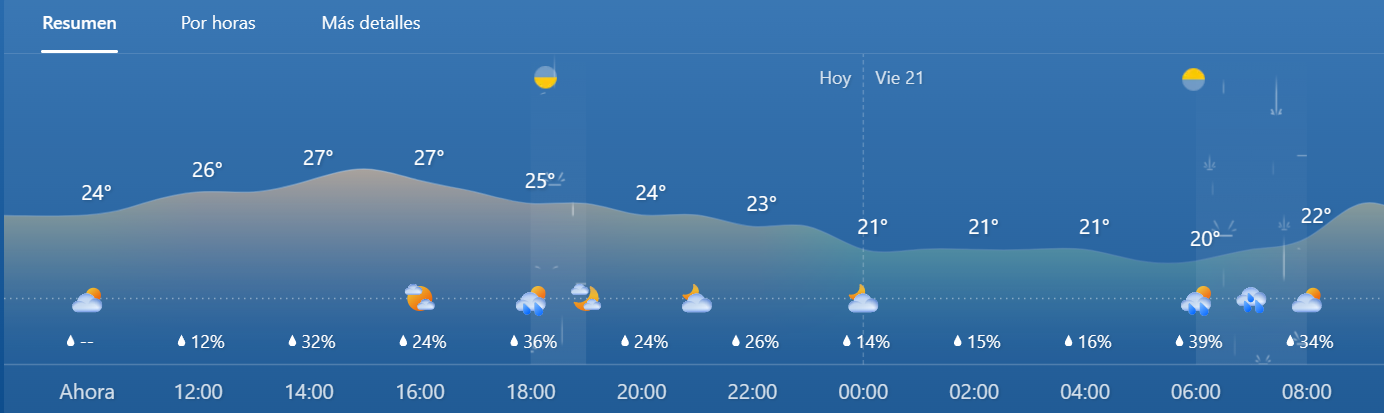

Podemos observar en internet que el promedio de remperatura en este lugar esta por encima de 20 grados centigrados normalmente por lo tanto es probable que no sean datos correctos los del sensor

In [98]:
Zero_value[(Zero_value['Departamento']=='VALLE DEL CAUCA')][['CodigoSensor', 'Municipio']]

,CodigoSensor,Municipio
38732,68,JAMUNDÍ
39286,68,BUENAVENTURA
39755,68,ANSERMANUEVO
40026,68,FLORIDA
40083,68,BUENAVENTURA
...,...,...
1572646,68,JAMUNDÍ
1573126,0068,FLORIDA
1574429,0068,FLORIDA
1574746,0068,ANSERMANUEVO


In [99]:
df = df[~((df['Departamento']=='VALLE DEL CAUCA') & (df['ValorObservado']==0))]

In [100]:
df.ValorObservado.value_counts()

ValorObservado
0.00000     1575
19.70000     721
24.90000     715
24.60000     710
24.30000     705
            ... 
23.01095       1
18.38111       1
27.04867       1
17.64576       1
19.65583       1
Name: count, Length: 71670, dtype: int64

In [101]:
df[df['Departamento']=='VALLE DEL CAUCA'].ValorObservado.value_counts()

ValorObservado
19.60000    538
19.70000    533
20.70000    520
20.50000    509
20.10000    501
           ... 
18.43067      1
28.13535      1
22.15787      1
27.78098      1
19.65583      1
Name: count, Length: 52290, dtype: int64

Vemos que ya no tenemos valorers en cero grados en el valle

In [102]:
df.keys()

Index(['CodigoEstacion', 'CodigoSensor', 'FechaObservacion', 'ValorObservado',
       'NombreEstacion', 'Departamento', 'Municipio', 'ZonaHidrografica',
       'Latitud', 'Longitud', 'DescripcionSensor', 'UnidadMedida', 'Date',
       'Time', 'horary'],
      dtype='object')

In [103]:
df.CodigoEstacion.unique()

array([54025010, 26125503, 54015020, 26065502, 26015040, 11080010,
       26075150, 26015030, 26095320, 57015010, 52015501, 11030010,
       52025080, 51025090, 26085160, 56010040, 26055100, 2604500039,
       2604500134, 26105240, 2610500131, 26075120, 55015020, 53045040,
       11159010, 2603500127, 26055110, 11105020, 5311500121, 53075020,
       52025090, 11120040, 54050010, 26115090, 54020020, 11050020,
       26105250, 54077210, 11035030, 26015010, 52020070, 21055070,
       56015010, 26015050, 52015050, 11175000, 26055120, 26125502,
       26065501, 53115501, 26115501, 26125507, 26075501, 54035501,
       53115502, 52025501, 56015040, 57025020, 26055501, 26085170,
       26035100, 26035090, 54020090, 26035501, 22025040, 5311500056,
       54010010, 56019010, '0052025501', '0021055070', '0026115501',
       '0054077210', '0026015030', '0026095320', '0053115501',
       '0026105250', '0054035501', '0026125507', '0026075120',
       '0026125503', '0026065502', '0026055120', '005402

In [104]:
df[['DescripcionSensor', 'Municipio', 'ValorObservado']]

,DescripcionSensor,Municipio,ValorObservado
1,Temp Aire 2 m,SAN JOSÉ DEL PALMAR,19.30000
19,Temp Aire 2 m,SEVILLA,24.59092
29,Temp Aire 2 m,TADÓ,23.50000
30,Temp Aire 2 m,SEVILLA,18.04923
33,Temp Aire 2 m,PIENDAMÓ,17.16564
...,...,...,...
1575096,Temp Aire 2 m,JAMUNDÍ,17.74065
1575097,Temp Aire 2 m,BALBOA,18.85790
1575107,Temp Aire 2 m,RESTREPO,17.02932
1575112,Temp Aire 2 m,BUENAVENTURA,25.70000


In [105]:
df.DescripcionSensor.value_counts()

DescripcionSensor
Temp Aire 2 m    166426
Name: count, dtype: int64

Podemos ver que todos los sensores tienen el mismo codigo y descripcion de sensor

In [119]:
#cambiar el formato de la fecha al formato aceptado por sql para fechas YYYY/MM/DD de MM/DD/YYYY
def transform_date_format(row:str)->str:
    try:
        date = re.findall(r'\d+', row)
        date = ''.join(f'{date[2]}/{date[0]}/{date[1]}')
        return date
    except ValueError:
        print(f'{row} : Dont match the date pattern')

In [117]:
transform_date_format('01/21/2020')

01/21/2020
['01', '21', '2020']
2020/01/21


In [121]:
df['Date'] = df.Date.apply(transform_date_format)

In [122]:
df

,CodigoEstacion,CodigoSensor,FechaObservacion,ValorObservado,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud,DescripcionSensor,UnidadMedida,Date,Time,horary
1,54025010,68,01/21/2020 01:00:00 AM,19.30000,PR CHOCO: SAN JOSE PALMAR,CHOCÓ,SAN JOSÉ DEL PALMAR,SAN JUÁN,4.898000,-76.232000,Temp Aire 2 m,°C,2020/01/21,01:00:00,AM
19,26125503,68,01/21/2020 01:20:00 PM,24.59092,LA SIRENA - AUT,VALLE DEL CAUCA,SEVILLA,CAUCA,4.285000,-75.902500,Temp Aire 2 m,°C,2020/01/21,01:20:00,PM
29,54015020,68,07/01/2019 04:00:00 AM,23.50000,PR CHOCO: TADO,CHOCÓ,TADÓ,SAN JUÁN,5.270000,-76.552000,Temp Aire 2 m,°C,2019/07/01,04:00:00,AM
30,26125503,68,01/21/2020 09:05:00 PM,18.04923,LA SIRENA - AUT,VALLE DEL CAUCA,SEVILLA,CAUCA,4.285000,-75.902500,Temp Aire 2 m,°C,2020/01/21,09:05:00,PM
33,26065502,68,01/21/2020 06:15:00 PM,17.16564,TRINIDAD LA - AUT,CAUCA,PIENDAMÓ,CAUCA,2.750556,-76.579167,Temp Aire 2 m,°C,2020/01/21,06:15:00,PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575096,0026065501,0068,10/24/2018 09:05:00 PM,17.74065,JAMUNDI - AUT,VALLE DEL CAUCA,JAMUNDÍ,CAUCA,3.215581,-76.680219,Temp Aire 2 m,°C,2018/10/24,09:05:00,PM
1575097,0052015501,0068,08/04/2019 03:05:00 AM,18.85790,BALBOA - AUT,CAUCA,BALBOA,PATÍA,2.125192,-77.192667,Temp Aire 2 m,°C,2019/08/04,03:05:00,AM
1575107,0053115502,0068,08/30/2017 04:55:00 AM,17.02932,JULIO FERNANDEZ - AUT,VALLE DEL CAUCA,RESTREPO,TAPAJE - DAGUA - DIRECTOS,3.809164,-76.533056,Temp Aire 2 m,°C,2017/08/30,04:55:00,AM
1575112,0054077210,0068,12/04/2018 10:00:00 AM,25.70000,JUANCHACO - AUT,VALLE DEL CAUCA,BUENAVENTURA,SAN JUÁN,3.925147,-77.349006,Temp Aire 2 m,°C,2018/12/04,10:00:00,AM


In [123]:
df.to_csv('../Datos/Datos_Hidrometorologicos_Pacifico.csv', index=False)

In [11]:
from geopy.geocoders import Nominatim #import module to get the place with his Cordinates

def obtener_ciudad_pais(latitud, longitud):
    geolocator = Nominatim(user_agent='mi_app_de_geolocalizacion') #OpenStreetMap Nominatim API Free but limited 
    location = geolocator.reverse((latitud, longitud), language="es", timeout=10)

    if location:
        direccion = location.address
        return direccion
    else:
        print(f"No se encontro la direccion en estas cordenadas  \nlatitud:{latitud}\nlongitud{longitud}")
        return None

In [4]:
obtener_ciudad_pais(3.409126, -76.523931)

'Carrera 47, San Judas Tadeo I, Comuna 10, Perímetro Urbano Santiago de Cali, Cali, Sur, Valle del Cauca, RAP Pacífico, 760024, Colombia'

In [8]:
df_clean = pd.read_csv('../Datos/Datos_Hidrometeorologicos_Pacifico.csv')

In [ ]:
df_clean['Direccion'] = df_clean.apply(lambda row: obtener_ciudad_pais(row['Latitud'], row['Longitud']), axis=1)
#Haciendo las pruebas no es posible utilizando la api de nominatim porque es gratuita por lo que es limitada y para la cantidad de datos es necesario un numero exorbitante de consultas

Descartamos esta posibilidad por lo menos de hacerlo de forma gratuita